<a href="https://colab.research.google.com/github/sophiasarica/my_project/blob/main/Sophia_Sarica_Project5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# DATA601-Project 5


# Part-I: Set-up

In [ ]:
import pandas as pd
dmv_hs =pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/dmv-highschools/dmv_hs.csv', 
                         index_col= 0)
maryland_hs = pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/dmv-highschools/maryland_hs.csv',
                          index_col = 0
                          )

# Part-II

__Tasks:__

- Change the column names according to the map given below.
- Name the new dataframe with new column names as `maryland`


'School Name': 'school_name',

'State Name [Public School] Latest available year': 'state_name', 

'Lowest Grade Offered [Public School] 2018-19': 'lowest_grade_offered'

'Highest Grade Offered [Public School] 2018-19': 'highest_grade_offered'

'Total Students All Grades (Excludes AE) [Public School] 2018-19': 'total_students_all_grades'

'Free and Reduced Lunch Students [Public School] 2018-19': 'free_and_reduced_lunch_students'

'Reduced-price Lunch Eligible Students [Public School] 2018-19': 'reduced-price_lunch_eligible_students'

'Latitude [Public School] 2018-19': 'latitude'

'Longitude [Public School] 2018-19': 'longitude'

'Magnet School [Public School] 2018-19': 'magnet_school'

'Charter School [Public School] 2018-19': 'charter_school'

'Shared Time School [Public School] 2018-19': 'shared_time_school'

'Urban-centric Locale [Public School] 2018-19']: 'urban_centric_locale'

In [ ]:
maryland_hs

School Name  ... Urban-centric Locale [Public School] 2018-19
0                             ABERDEEN HIGH  ...                          22-Suburb: Mid-size
1        ACADEMY OF HEALTH SCIENCES AT PGCC  ...                             21-Suburb: Large
2    ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH  ...                               11-City: Large
3                      ALBERT EINSTEIN HIGH  ...                             21-Suburb: Large
4                             ALLEGANY HIGH  ...                               13-City: Small
..                                      ...  ...                                          ...
199                         WILDE LAKE HIGH  ...                               13-City: Small
200                       WILLIAMSPORT HIGH  ...                          22-Suburb: Mid-size
201                  WINSTON CHURCHILL HIGH  ...                             21-Suburb: Large
202                       WINTERS MILL HIGH  ...                             41-Rural: Fringe
203  WOODLAWN HIGH CENTER FOR PRE-ENG. RES.  ...                             21-Suburb: Large

[204 rows x 13 columns]

In [ ]:
maryland = pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/dmv-highschools/hs_data_with_new_column_names.csv', 
                       index_col = 0)

## Part - III

__Tasks__

- Drop the column `state_name_latest_available_year` from the data frame `maryland`. Make sure that the changes are reflected in the dataframe `maryland` without re-assigning.

- Change name of the column 'state_name_latest_available_year' to 'state_name' in `dmv_hs` dataframe. Make sure that you make the changes in the original dataframe `dmv_hs`.

- Resulting dataframes should look like below. 



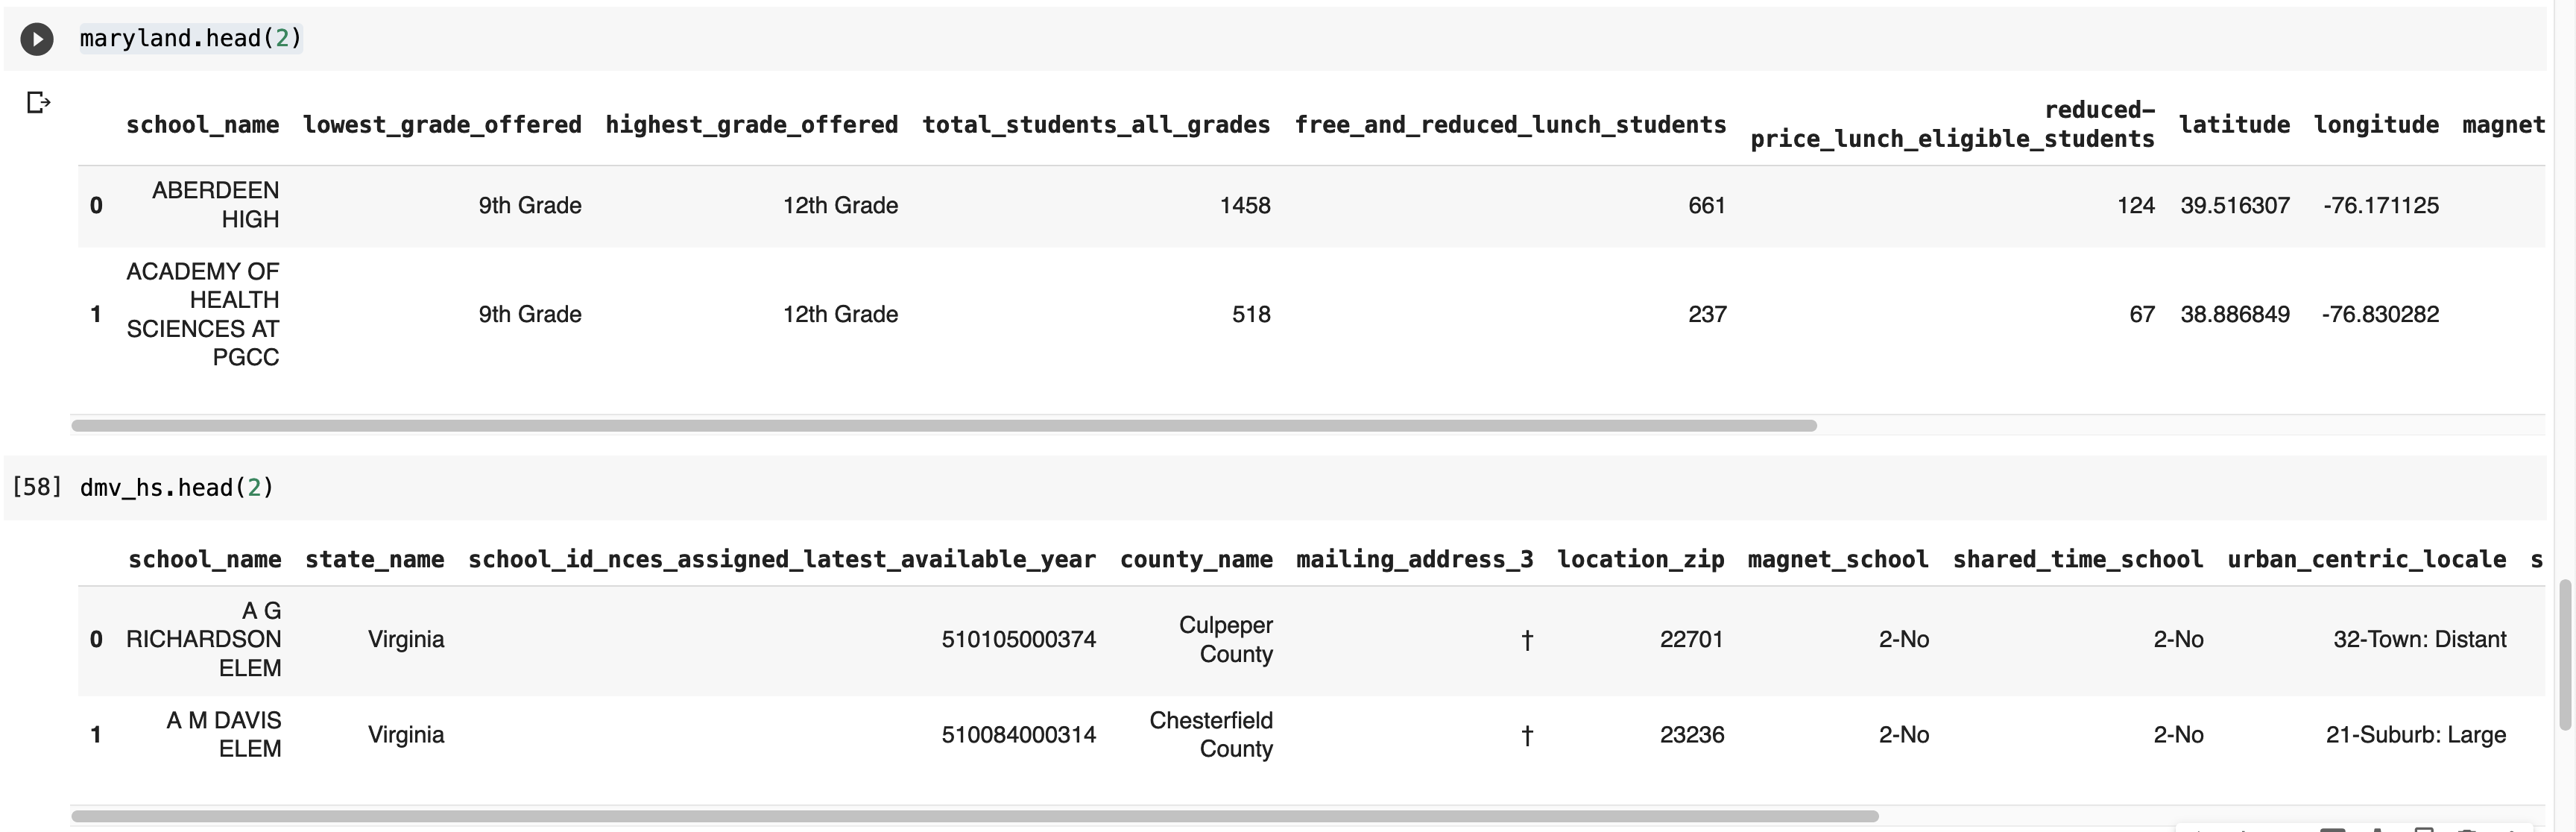

In [ ]:
maryland.drop('state_name_latest_available_year', axis = 1 , inplace=True)

maryland.head(2)

school_name  ... urban-centric_locale
0                       ABERDEEN HIGH  ...  22-Suburb: Mid-size
1  ACADEMY OF HEALTH SCIENCES AT PGCC  ...     21-Suburb: Large

[2 rows x 12 columns]

In [ ]:
dmv_hs.rename(columns = {'state_name_latest_available_year':'state_name'}, inplace = True)
#df.rename(columns={"A": "a", "B": "c"})}
dmv_hs.head(2)

school_name state_name  ...  state_agency_id state_school_id
0  A G RICHARDSON ELEM   Virginia  ...           VA-024  VA-024-0240240
1       A M DAVIS ELEM   Virginia  ...           VA-021  VA-021-0210620

[2 rows x 12 columns]

## Part- IV

 How many different states are there in the `dmv_highschool` dataset? Make sure you check before jump into a conclusion.

In [ ]:
#dmv_hs.state_name.str.lower().unique()
len(dmv_hs.state_name.str.lower().unique())

3

Standardize the state names in `dmv_hs` dataframe. That is: First letter capital, all others lower case. e.g. MArylanD --> Maryland. Double check your answer.

- Make sure that you changed the column in the original dataframe. 



In [ ]:
dmv_hs.state_name = dmv_hs.state_name.str.capitalize()
dmv_hs.state_name

0       Virginia
1       Virginia
2       Virginia
3       Virginia
4       Maryland
          ...   
3763    Maryland
3764    Maryland
3765    Virginia
3766    Virginia
3767    Virginia
Name: state_name, Length: 3768, dtype: object

## Part - V

How many different locations (latitude, longitude) are there in this dataframe?

In [ ]:
maryland.groupby(['latitude', 'longitude']).size() 
#maryland.shape
len(maryland.groupby(['latitude', 'longitude']).size())

202

## Part- VI

Note that some locations are repeating in the dataframe. 

- Find out which location(latitude, longitude) is repeating and find out why these high schools entered as a separate rows in this dataset.



In [ ]:
## enter your code answer here

#maryland.groupby(['latitude', 'longitude']).size().sort_values()
maryland1 = maryland.groupby(['latitude', 'longitude']).size()
maryland1[maryland1>1]


latitude   longitude 
39.076619  -76.558282    2
39.534835  -76.990829    2
dtype: int64

## Part- VII

For the problems below we will be using the dataframe `maryland_big` which is a combination of `maryland` and `dmv_hs` datasets. Note that in this dataframe in addition to columns of `maryland` dataframe we have extra information like `county_name` and `location_zip`.

In [ ]:
maryland_big = pd.read_csv('https://raw.githubusercontent.com/mguner/teaching/main/datasets/dmv-highschools/MD_HS_Combined.csv')
print(maryland_big.shape)
maryland_big.head()

(204, 21)


school_name  ... state_school_id
0                           ABERDEEN HIGH  ...    MD-12-120270
1      ACADEMY OF HEALTH SCIENCES AT PGCC  ...    MD-16-161350
2  ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH  ...    MD-30-300413
3                    ALBERT EINSTEIN HIGH  ...    MD-15-150789
4                           ALLEGANY HIGH  ...    MD-01-010606

[5 rows x 21 columns]

__Task__

- For each county find the average number of students. 
- Sort the result in an descending order.


In [ ]:
maryland_big.groupby('county_name').total_students_all_grades.mean().sort_values(ascending = False)
#flights.groupby('dest').dep_delay.mean()


county_name
Montgomery County         1972.600000
Anne Arundel County       1761.230769
St. Mary's County         1719.000000
Howard County             1467.666667
Prince George's County    1371.461538
Calvert County            1279.750000
Charles County            1211.000000
Talbot County             1196.000000
Queen Anne's County       1189.000000
Baltimore County          1180.037037
Frederick County          1172.000000
Harford County            1124.500000
Wicomico County            955.750000
Cecil County               913.600000
Carroll County             911.111111
Washington County          850.285714
Caroline County            823.500000
Allegany County            742.666667
Baltimore city             692.680000
Worcester County           672.666667
Dorchester County          656.000000
Garrett County             577.000000
Kent County                563.000000
Name: total_students_all_grades, dtype: float64

## Part -VIII

For each school find the ratio of `free_and_reduced_lunch_students` to the total number of students who are in the same __zipcode__ with this school. Record these values in a new column named `ratio`. Suppose in high school _A_ there are 13 students eligible for free and reduced lunch and the zipcode of the school is 20001. If there is total of 200 students in the zipcode 20001 then for High School A your code should return 13/200. Hint: We used similar method at the data transformations part-II class.

In [ ]:
def ratiofunc(group):
  return group/group.sum()

maryland_big.groupby('location_zip').free_and_reduced_lunch_students.transform(ratiofunc)

maryland_big['ratio'] = maryland_big.groupby('location_zip').free_and_reduced_lunch_students.transform(ratiofunc)
maryland_big.head(10)


school_name  ...     ratio
0                                  ABERDEEN HIGH  ...  1.000000
1             ACADEMY OF HEALTH SCIENCES AT PGCC  ...  0.132107
2         ACHIEVEMENT ACADEMY @ HARBOR CITY HIGH  ...  0.300219
3                           ALBERT EINSTEIN HIGH  ...  1.000000
4                                  ALLEGANY HIGH  ...  0.452055
5                                 ANNAPOLIS HIGH  ...  1.000000
6                      ANNE ARUNDEL EVENING HIGH  ...  0.043478
7                                   ARUNDEL HIGH  ...  1.000000
8                                  ATHOLTON HIGH  ...  0.220803
9  AUGUSTA FELLS SAVAGE INSTITUTE OF VISUAL ARTS  ...  0.276750

[10 rows x 22 columns]